## 연속확률분포

### 정규분포

In [1]:
import os
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

#시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#os에 따른 깨짐 문제
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family ="AppleGothic"

#값 깨지는 문제 해결 위해 파라미터 설정
sns.set(font=font_family, rc={"axes.unicode_minus":False})

In [2]:
## 기대값 70, 표준편차 10
norm = stats.norm(loc = 70, scale=10)

In [3]:
# 구간 내 숫자를 균일한 간격으로 생성(x축)
# -10 ~ 150까지 2000개 생성
s_x = np.linspace(-10, 150, 2000)

# 확률밀도함수
s_pdf = norm.pdf(s_x)

In [4]:
# 확률밀도함수 계산
mu = 70 
sigma = 10
s_pdf_cal = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(s_x-mu)**2 / (2 * sigma **2))

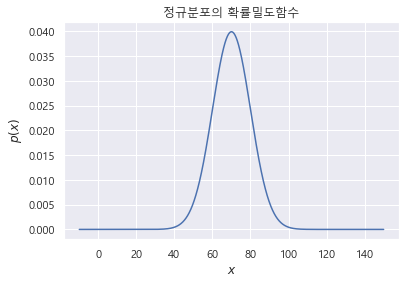

In [5]:
#정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [6]:
# 누적분포함수
s_cdf = norm.cdf(s_x)

# 누적분포함수 계싼
from scipy.special import erf
s_cdf_cal = 0.5 * (1 + erf((s_x-mu)/(np.sqrt(2* sigma **2))))

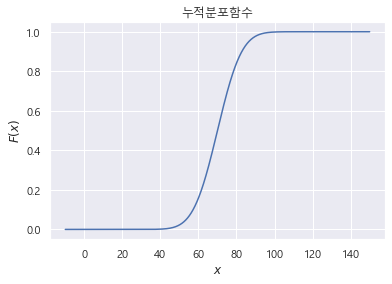

In [7]:
# 누적분포함수 시각화
plt.plot(s_x, s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 표준정규분포

In [8]:
# 기대값이 0이고 표준편차가 11인 정규분포
stat_norm = stats.norm(loc=0, scale=1)

# 구간 내에 숫자를 균일한 간격으로 생성(x축)
# -5 ~ 150 까지 100개 생성
sn_x = np.linspace(-5, 5, 1000)

#확률밀도함수
sn_pdf = stat_norm.pdf(sn_x)

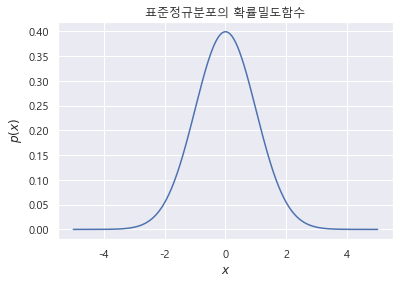

In [9]:
# 시각화
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 표준화

In [10]:
# random data
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)
n_data.shape

(1000,)

In [11]:
## n_data의 mean, std 계산
n_mean = np.mean(n_data)
print('mean:',np.mean(n_data))

n_std = np.std(n_data)
print("standard deviation:", np.std(n_data))

mean: 50.99
standard deviation: 28.880406853089863


In [12]:
# 확률밀도함수
norm_n_data = stats.norm(loc = n_mean, scale = n_std)
n_pdf = norm_n_data.pdf(n_data)
n_data.shape

(1000,)

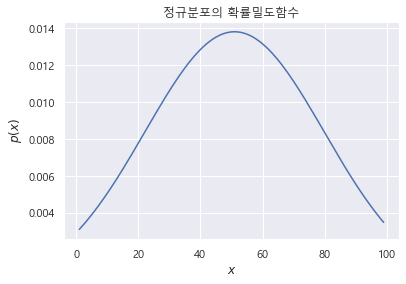

In [13]:
# 정규분포 시각화
plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [14]:
# 표준화 수행
z_data = list(n_data)
z_data_list=[]

for i in z_data:
    z = (i - n_mean) / n_std
    z_data_list.append(z)

In [15]:
## 표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

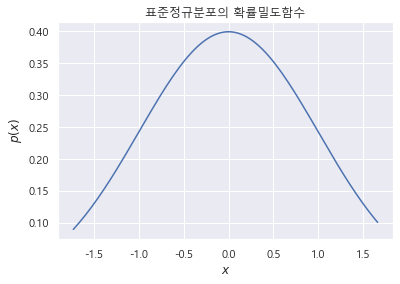

In [16]:
# 표준정규분포 시각화
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 카이제곱분포

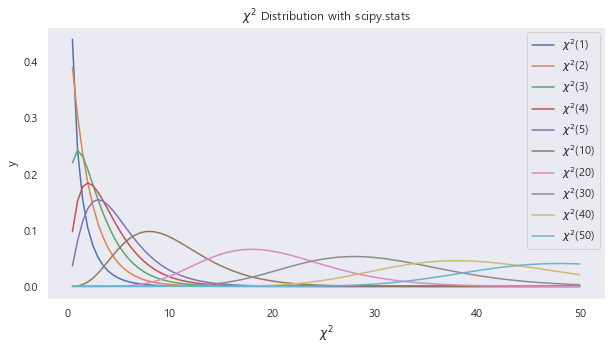

In [17]:
## 카이제곱분포 표현
from scipy.stats import chi2

## 라인스페이스 x축 설정
Chi_X = np.linspace(0.5, 50, 100)

#자유도에 따른 카이제곱분포 시각화
plt.figure(figsize=(10,5)) #플롯 사이즈 지정
for dof in [1,2,3,4,5,10,20,30,40,50]: 
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
            label=r'$\chi^2$('+ str(dof)+')')

plt.xlabel(r'$\chi^2$') #x축 레이블 지정
plt.ylabel("y") #y축 레이블 지정
plt.grid() #플롯에 격자 보이기
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend() #범례 표시
plt.show() #플롯

In [18]:
# 카이제곱분포를 이용한 적합성 검정
# 한개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
# 교차분석표 생성(자유도2)

# 관찰도수
x_o = [324, 78, 261]

# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e], columns = ['서울','인천','대구'], index = ['관찰도수','기대도수'])
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [19]:
# 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# p value=0.0001725 로 유의수준 0.05보다 작으므로 
# 귀무가설 지지, 대립가설 기각
# 관찰빈도와 기대빈도는 다르다

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

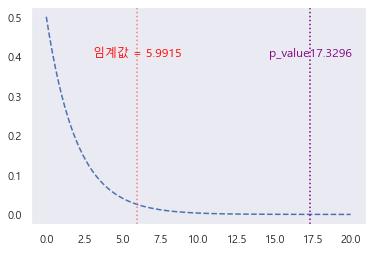

In [20]:
# 위 사례의 카이제곱분포 시각화
from scipy.stats import chi2

dof = 2 #자유도
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 5%
x_95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시
plt.axvline(x=x_95_c, color='lightcoral',linestyle=':')
plt.text(x_95_c, .4, '임계값 = '+str(round(x_95_c,4)),
        horizontalalignment='center',color='red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x= result[0], color='purple',linestyle=':')
plt.text(result[0], .4, 'p_value' + str(round(result[0], 4)),
         horizontalalignment='center',color='purple')
plt.grid()
plt.show()